In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [13,8]
plt.rcParams['font.size'] = 14
plt.style.use('seaborn-whitegrid')

In [3]:
df = pd.read_csv("diabetes.csv")

In [97]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [99]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### column such as Glucose, BP, SkinTickness, Insulin, BMI cannot be zero hence will be considered as null
#### 

In [101]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### filling missing value with mean

In [10]:
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']
for i in col:
  df[i].replace(0,df[i].mean(),inplace=True)

In [11]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [12]:
X.var()

Pregnancies                   11.354056
Glucose                      926.351048
BloodPressure                146.795798
SkinThickness                 92.760798
Insulin                     8663.952981
BMI                           47.270761
DiabetesPedigreeFunction       0.109779
Age                          138.303046
dtype: float64

### EDA

<AxesSubplot:>

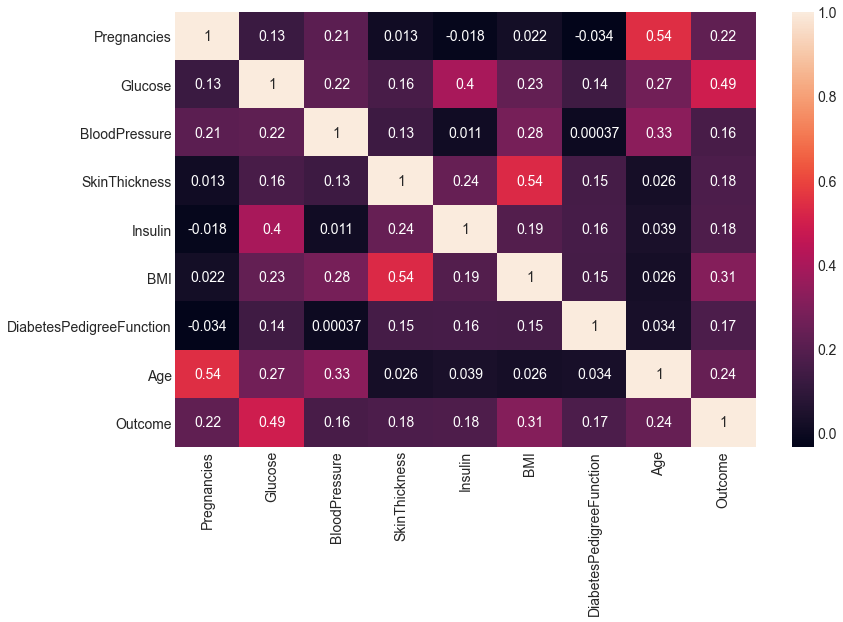

In [59]:
sns.heatmap(df.corr(), annot = True)

### Conculsion 
    1. Age  and pregnencies 0.54
    2. Glucose and outcome 0.49
    3. Skinthickness and bmi 0.54
    4. Insulin vs Glucose 0.4

In [110]:
def plot(x, y):
    sns.scatterplot(x, y, hue = df.Outcome, style=df.Outcome)
    sns.relplot(x, y, col=df.Outcome, s = 5 )
#     sns.catplot(x ,y, hue=df.Outcome)

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


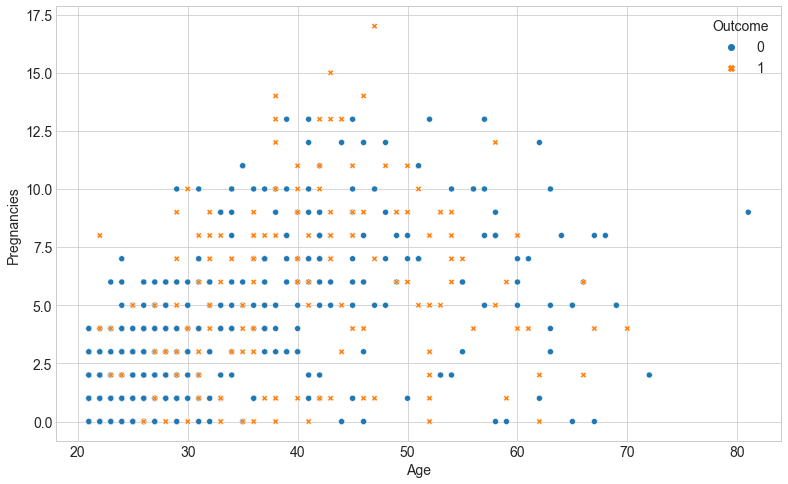

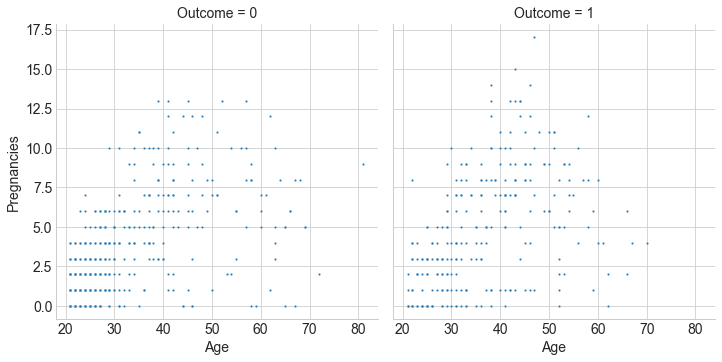

In [111]:
plot(df.Age, df.Pregnancies)

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


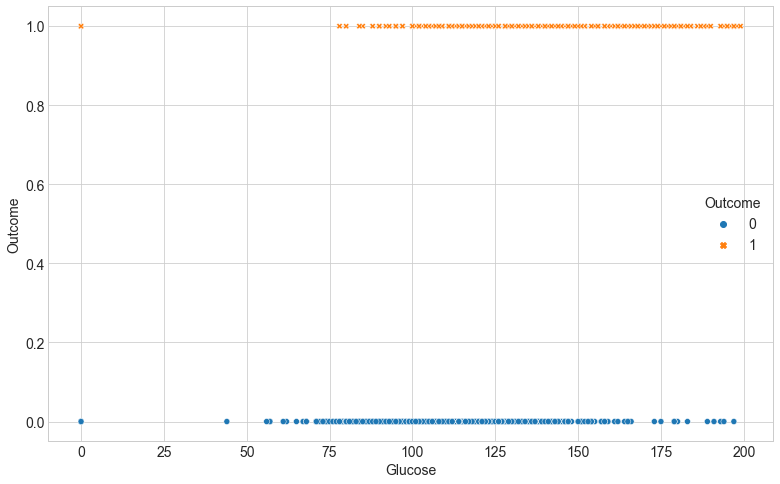

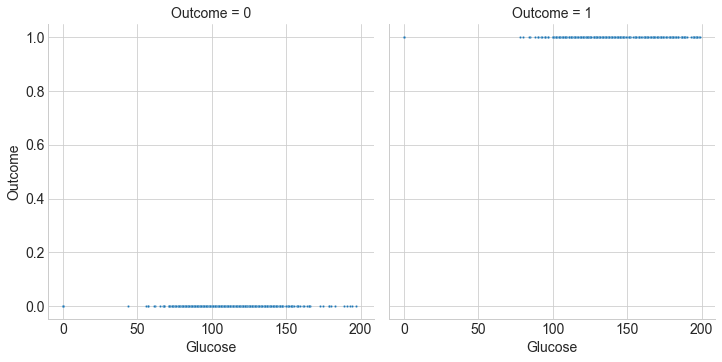

In [112]:
plot(df.Glucose, df.Outcome)

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


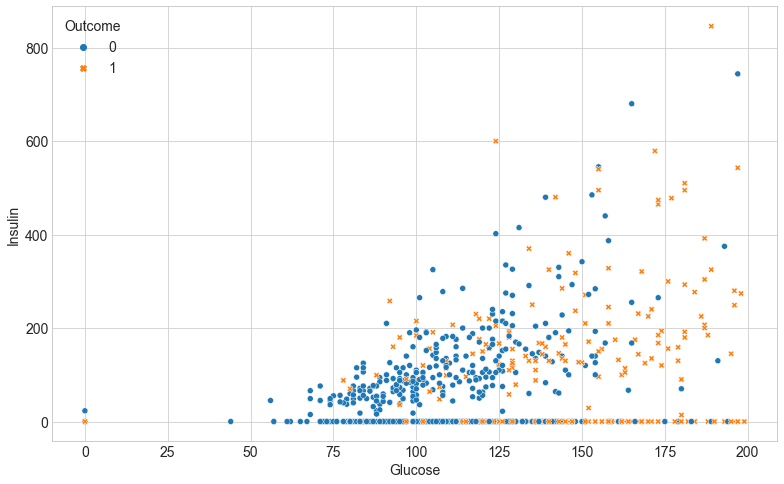

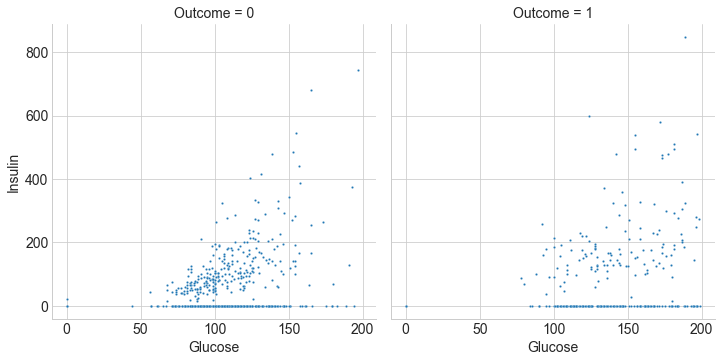

In [113]:
plot(df.Glucose, df.Insulin)

In [107]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled =  pd.DataFrame(sc_X.fit_transform(X), columns=X.columns)

In [36]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [35]:
X_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679954,0.309315,2.222711,0.659428,0.065376,-0.908682,2.532136
764,-0.547919,0.010468,-0.186224,0.040885,-0.417768,0.632988,-0.398282,-0.531023
765,0.342981,-0.022409,-0.021044,-0.374700,-0.071599,-0.909751,-0.685193,-0.275760
766,-0.844885,0.141977,-1.012121,-0.630654,-0.417768,-0.342140,-0.371101,1.170732


In [14]:
X_scaled.var()

Pregnancies                 1.001304
Glucose                     1.001304
BloodPressure               1.001304
SkinThickness               1.001304
Insulin                     1.001304
BMI                         1.001304
DiabetesPedigreeFunction    1.001304
Age                         1.001304
dtype: float64

In [37]:
X_scaled.std()

Pregnancies                 1.000652
Glucose                     1.000652
BloodPressure               1.000652
SkinThickness               1.000652
Insulin                     1.000652
BMI                         1.000652
DiabetesPedigreeFunction    1.000652
Age                         1.000652
dtype: float64

z

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 2)

## Model building

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

In [52]:
clf = [DecisionTreeClassifier(max_depth=5),
       KNeighborsClassifier(n_neighbors=9),
       SVC(),
       GradientBoostingClassifier(),
      CatBoostClassifier(iterations= 30 ,learning_rate=0.1)]
for i in clf:
    i.fit(X_train,y_train)

0:	learn: 0.6664547	total: 5.71ms	remaining: 166ms
1:	learn: 0.6442848	total: 9.86ms	remaining: 138ms
2:	learn: 0.6279341	total: 13.2ms	remaining: 119ms
3:	learn: 0.6104409	total: 16.6ms	remaining: 108ms
4:	learn: 0.5961402	total: 19.8ms	remaining: 99ms
5:	learn: 0.5842454	total: 23.3ms	remaining: 93.2ms
6:	learn: 0.5720448	total: 26.7ms	remaining: 87.7ms
7:	learn: 0.5621975	total: 30.2ms	remaining: 83ms
8:	learn: 0.5517704	total: 33.5ms	remaining: 78.1ms
9:	learn: 0.5414965	total: 36.7ms	remaining: 73.3ms
10:	learn: 0.5311224	total: 40ms	remaining: 69ms
11:	learn: 0.5235261	total: 44.5ms	remaining: 66.8ms
12:	learn: 0.5147848	total: 47.9ms	remaining: 62.7ms
13:	learn: 0.5057207	total: 51.1ms	remaining: 58.4ms
14:	learn: 0.4987584	total: 54.5ms	remaining: 54.5ms
15:	learn: 0.4933095	total: 57.8ms	remaining: 50.6ms
16:	learn: 0.4873544	total: 61ms	remaining: 46.6ms
17:	learn: 0.4824446	total: 64.2ms	remaining: 42.8ms
18:	learn: 0.4770275	total: 67.5ms	remaining: 39.1ms
19:	learn: 0.4736

In [18]:
clf

[DecisionTreeClassifier(max_depth=5),
 KNeighborsClassifier(),
 SVC(),
 GradientBoostingClassifier(),

In [53]:
from sklearn.metrics import accuracy_score

## score on training set

In [116]:
y_train_pred = []
a_train = []
for c,i in enumerate(clf):
    y_train_pred.append(i.predict(X_train))
    a_train.append(accuracy_score(y_train_pred[c],y_train))
    print(f"{i} score: {a_train[c]*100}%")

DecisionTreeClassifier(max_depth=5) score: 83.9851024208566%
KNeighborsClassifier(n_neighbors=9) score: 77.6536312849162%
SVC() score: 76.72253258845437%
GradientBoostingClassifier() score: 92.92364990689012%
<catboost.core.CatBoostClassifier object at 0x000000000E0D6610> score: 81.3780260707635%


## score on test set

In [117]:
y_test_pred = []
a_test = []
for c,i in enumerate(clf):
    y_test_pred.append(i.predict(X_test))
    a_test.append(accuracy_score(y_test_pred[c],y_test))
    print(f"{i} score: {a_test[c]*100}%")

DecisionTreeClassifier(max_depth=5) score: 75.32467532467533%
KNeighborsClassifier(n_neighbors=9) score: 76.62337662337663%
SVC() score: 75.32467532467533%
GradientBoostingClassifier() score: 74.89177489177489%
<catboost.core.CatBoostClassifier object at 0x000000000E0D6610> score: 76.62337662337663%


### confusion matrix for train set

In [120]:
 from sklearn.metrics import confusion_matrix
for c,i in enumerate(clf):
    print(f"model : {clf[c]}\nAccuracy score: {a_train[c]*100}%\nconfusion matrix:")
    print(confusion_matrix(y_train, y_train_pred[c]))
    print("-----------------------------------------------------")

model : DecisionTreeClassifier(max_depth=5)
Accuracy score: 83.9851024208566%
confusion matrix:
[[327  18]
 [ 68 124]]
-----------------------------------------------------
model : KNeighborsClassifier(n_neighbors=9)
Accuracy score: 77.6536312849162%
confusion matrix:
[[296  49]
 [ 71 121]]
-----------------------------------------------------
model : SVC()
Accuracy score: 76.72253258845437%
confusion matrix:
[[318  27]
 [ 98  94]]
-----------------------------------------------------
model : GradientBoostingClassifier()
Accuracy score: 92.92364990689012%
confusion matrix:
[[337   8]
 [ 30 162]]
-----------------------------------------------------
model : <catboost.core.CatBoostClassifier object at 0x000000000E0D6610>
Accuracy score: 81.3780260707635%
confusion matrix:
[[315  30]
 [ 70 122]]
-----------------------------------------------------


### confusion matrix on test set

In [121]:
from sklearn.metrics import confusion_matrix
for c,i in enumerate(clf):
    print(f"model : {clf[c]}\nAccuracy score: {a_test[c]*100}%\nconfusion matrix:")
    print(confusion_matrix(y_test, y_test_pred[c]))
    print("\n-----------------------------------------------------")

model : DecisionTreeClassifier(max_depth=5)
Accuracy score: 75.32467532467533%
confusion matrix:
[[139  16]
 [ 41  35]]

-----------------------------------------------------
model : KNeighborsClassifier(n_neighbors=9)
Accuracy score: 76.62337662337663%
confusion matrix:
[[135  20]
 [ 34  42]]

-----------------------------------------------------
model : SVC()
Accuracy score: 75.32467532467533%
confusion matrix:
[[142  13]
 [ 44  32]]

-----------------------------------------------------
model : GradientBoostingClassifier()
Accuracy score: 74.89177489177489%
confusion matrix:
[[130  25]
 [ 33  43]]

-----------------------------------------------------
model : <catboost.core.CatBoostClassifier object at 0x000000000E0D6610>
Accuracy score: 76.62337662337663%
confusion matrix:
[[140  15]
 [ 39  37]]

-----------------------------------------------------


In [125]:
from sklearn.metrics import classification_report
for c,i in enumerate(clf):
    print(f"model : {clf[c]}\nAccuracy score: {a_test[c]*100}%\n")
    print(classification_report(y_test, y_test_pred[c]))
    print("----------------------------------------------------------------")

model : DecisionTreeClassifier(max_depth=5)
Accuracy score: 75.32467532467533%

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       155
           1       0.69      0.46      0.55        76

    accuracy                           0.75       231
   macro avg       0.73      0.68      0.69       231
weighted avg       0.74      0.75      0.74       231

----------------------------------------------------------------
model : KNeighborsClassifier(n_neighbors=9)
Accuracy score: 76.62337662337663%

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       155
           1       0.68      0.55      0.61        76

    accuracy                           0.77       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231

----------------------------------------------------------------
model : SVC()
Accuracy score: 75.32467532467533%

      

In [22]:
# X_train.columns
# p = clf[0].predict([[3,23,54,23,34,50,23,23]])
# print(p)

[1]


In [23]:
# def pred():    
#     prg = input("Enter no. of time pregnant: ")
#     glu = input("Enter glucose: ")
#     bp= input("Enter BP: ")
#     sk= input("Enter skinthickness: ")
#     ins = input("Enter insulin: ")
#     bmi = input("ENter BMI: ")
#     dpf = input("Enter diabetes pedegree function: ")
#     age = input("Enter age: ")
#     p = clf[0].predict([[prg,glu,bp,sk,ins,bmi,dpf,age]])
#     if p == 1:
#         print("You might have diabetes")
#     else:
#         print("You do not have diabetes")

In [25]:
# pred()